In [1]:
%matplotlib inline

In [2]:
import networkx as nx
import dgl
import matplotlib.pyplot as plt
import torch 
import numpy as np
import scipy.sparse as spp

Using backend: pytorch


# Graph creation

## From networkx

In [3]:
nx_graph = nx.cycle_graph(4)
dgl_graph = dgl.DGLGraph(nx_graph)

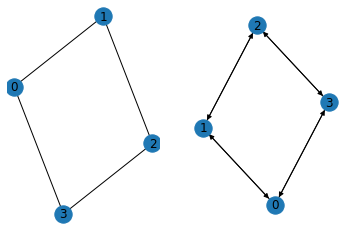

In [4]:
plt.subplot(121)
nx.draw(nx_graph, with_labels=True)
plt.subplot(122)
nx.draw(dgl_graph.to_networkx(), with_labels=True)

The graph converted back is explicitly bi-directional.

## From PyTorch tensor

In [5]:
u = torch.tensor([0, 1, 2, 3, 4])
v = torch.tensor([1, 2, 3, 4, 5])
path_graph = dgl.DGLGraph((u, v))

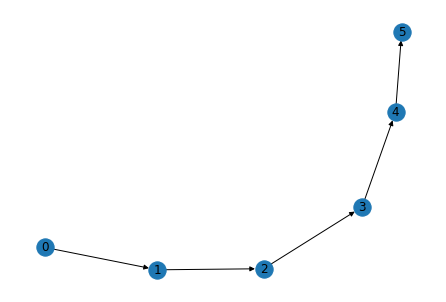

In [6]:
nx.draw(path_graph.to_networkx(), with_labels=True)

In [7]:
adjacency_matrix = path_graph.adjacency_matrix()

/home/ppeczek/anaconda3/envs/DGLExploration/lib/python3.7/site-packages/dgl/base.py:25: UserWarning: Currently adjacency_matrix() returns a matrix with destination as rows by default.  In 0.5 the result will have source as rows (i.e. transpose=True)
  warnings.warn(msg, warn_type)


In [8]:
adjacency_matrix

tensor(indices=tensor([[1, 2, 3, 4, 5],
                       [0, 1, 2, 3, 4]]),
       values=tensor([1., 1., 1., 1., 1.]),
       size=(6, 6), nnz=5, layout=torch.sparse_coo)

In [9]:
adjacency_matrix.to_dense().numpy()

array([[0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

## From numpy array

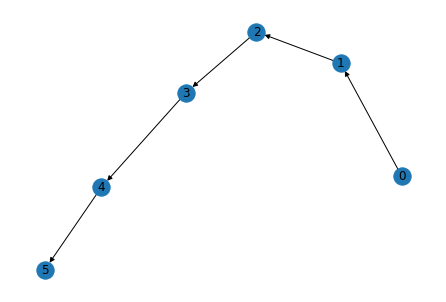

In [15]:
u = np.array([0, 1, 2, 3, 4])
v = np.array([1, 2, 3, 4, 5])
path_graph = dgl.DGLGraph((u, v))
nx.draw(path_graph.to_networkx(), with_labels=True)

Type of adjacency matrix is related to backend of choice (PyTorch, MXNet etc)

In [16]:
adjacency_matrix = path_graph.adjacency_matrix()
print(adjacency_matrix)

tensor(indices=tensor([[1, 2, 3, 4, 5],
                       [0, 1, 2, 3, 4]]),
       values=tensor([1., 1., 1., 1., 1.]),
       size=(6, 6), nnz=5, layout=torch.sparse_coo)


/home/ppeczek/anaconda3/envs/DGLExploration/lib/python3.7/site-packages/dgl/base.py:25: UserWarning: Currently adjacency_matrix() returns a matrix with destination as rows by default.  In 0.5 the result will have source as rows (i.e. transpose=True)
  warnings.warn(msg, warn_type)


## From sparse adjacency matrix

One can convert back from adjacency matrix (which must be sparse array! tensor cannot be used)

The graph creation could be probably easier with this approach:
```python
class DGLGraph:
    
    @classmethod
    def from_scipy_sparse_matrix(cls, ...) -> DGLGraph:
        ...
```

In [10]:
adjacency_matrix = path_graph.adjacency_matrix_scipy()
retrieved_graph = dgl.DGLGraph()
retrieved_graph.from_scipy_sparse_matrix(spmat=adjacency_matrix)

/home/ppeczek/anaconda3/envs/DGLExploration/lib/python3.7/site-packages/dgl/base.py:25: FutureWarning: Adjacency matrix by default currently returns edge IDs.  As a result there is one 0 entry which is not eliminated.  In the next release it will return 1s by default, and 0 will be eliminated otherwise.
  warnings.warn(msg, warn_type)


It seems like a bug - edges are pointing in the oposite site (may be only something with visualisation). That may be connected with the following warning:

```
/home/ppeczek/anaconda3/envs/DGLExploration/lib/python3.7/site-packages/dgl/base.py:25: UserWarning: Currently adjacency_matrix() returns a matrix with destination as rows by default.  In 0.5 the result will have source as rows (i.e. transpose=True)
  warnings.warn(msg, warn_type)
```

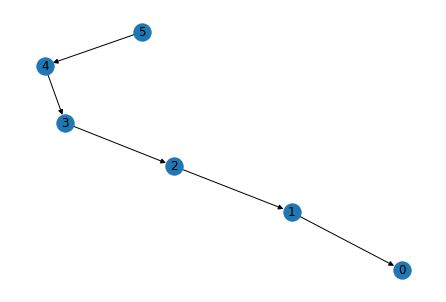

In [11]:
nx.draw(retrieved_graph.to_networkx(), with_labels=True)

In [12]:
adjacency_matrix = retrieved_graph.adjacency_matrix().to_dense().numpy()

__Adjacency matrix seem to show why the bug occurs!__

In [13]:
adjacency_matrix

array([[0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0.]], dtype=float32)

## From edges list

In [20]:
edges_list = [(0, 1), (2, 3), (4, 6)]
edges_list_graph = dgl.DGLGraph(edges_list)

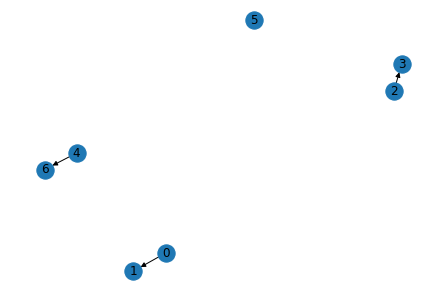

In [21]:
nx.draw(edges_list_graph.to_networkx(), with_labels=True)

Bare in mind that any discontinuation if edges indices will be interpreted as verices of degree 0!

In [22]:
adjacency_matrix = edges_list_graph.adjacency_matrix().to_dense().numpy()

In [23]:
print(adjacency_matrix)

[[0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]]


# Features that vertex/edge can be supplied

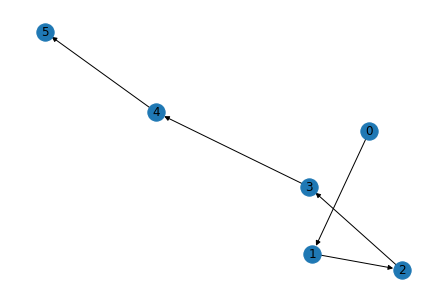

In [30]:
u = np.array([0, 1, 2, 3, 4])
v = np.array([1, 2, 3, 4, 5])
path_graph = dgl.DGLGraph((u, v))
nx.draw(path_graph.to_networkx(), with_labels=True)

## Vertices' features

In [31]:
print(path_graph.ndata)

{}


Fetures for all verices must be specified at once

In [33]:
path_graph.ndata["some_feature"] = torch.tensor([
    [0, 0.0],
    [1, 1.0],
    [2, 2.0],
    [3, 3.0],
    [4, 4.0],
])

DGLError: Expect number of features to match number of nodes (len(u)). Got 5 and 6 instead.

In [34]:
path_graph.ndata["some_feature"] = torch.tensor([
    [0, 0.0],
    [1, 1.0],
    [2, 2.0],
    [3, 3.0],
    [4, 4.0],
    [5, 5.0]
])

## Edges' features

In [35]:
print(path_graph.edata)

{}


In [38]:
path_graph.edata["w"] = torch.randn(5, 2)

In [44]:
path_graph.edge_id(1, 0, return_array=True)

tensor([], dtype=torch.int64)

In [45]:
path_graph.edge_id(0, 1, return_array=False)

0

In [49]:
path_graph.edata['w'][path_graph.edge_id(2, 3)] = torch.ones(1, 2)

In [50]:
path_graph.edata

{'w': tensor([[-0.5475, -0.2915],
        [ 1.0589, -0.6832],
        [ 1.0000,  1.0000],
        [ 0.9244,  0.8890],
        [ 1.1609,  0.8887]])}

Additional features do not modify adjacency matrix

In [51]:
path_graph.adjacency_matrix().to_dense().numpy()

/home/ppeczek/anaconda3/envs/DGLExploration/lib/python3.7/site-packages/dgl/base.py:25: UserWarning: Currently adjacency_matrix() returns a matrix with destination as rows by default.  In 0.5 the result will have source as rows (i.e. transpose=True)
  warnings.warn(msg, warn_type)


array([[0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)